In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import joblib


In [21]:
data = pd.read_csv('fraud_detection.xls')
data.head()

,Transaction_Amount,Transaction_Time,Account_Age,Previous_Location,New_Location,Location_Change,Is_Fraud
0,67.640523,12,4.289545,New York,Houston,1,0.0
1,54.001572,16,69.876618,Chicago,Phoenix,1,0.0
2,59.787380,20,71.008455,San Diego,Los Angeles,1,0.0
3,72.408932,1,91.646912,Dallas,Philadelphia,1,0.0
4,68.675580,11,16.800002,Dallas,Houston,1,0.0


In [22]:
data.shape

(10000, 7)

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_Amount  10000 non-null  float64
 1   Transaction_Time    10000 non-null  int64  
 2   Account_Age         10000 non-null  float64
 3   Previous_Location   10000 non-null  object 
 4   New_Location        10000 non-null  object 
 5   Location_Change     10000 non-null  int64  
 6   Is_Fraud            10000 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


In [25]:
#change Is_Fraud from float to int
data['Is_Fraud'] = data['Is_Fraud'].astype(int)

In [ ]:
data.describe()

,Transaction_Amount,Transaction_Time,Account_Age,Location_Change,Is_Fraud
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,52.882320,11.50600,98.889524,0.898400,0.020000
std,24.790510,6.89476,98.874065,0.302137,0.140007
min,12.598994,0.00000,1.000000,0.000000,0.000000
25%,43.249929,5.00000,27.243593,1.000000,0.000000
50%,49.967298,12.00000,68.808923,1.000000,0.000000
75%,56.903145,18.00000,137.471600,1.000000,0.000000
max,343.260177,23.00000,920.766040,1.000000,1.000000


In [26]:
#Check for duplicates in the data set
dup=data.duplicated()
print(dup)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool


In [27]:
#handle missing values
data.isnull().sum()

,0
Transaction_Amount,0
Transaction_Time,0
Account_Age,0
Previous_Location,0
New_Location,0
Location_Change,0
Is_Fraud,0


In [28]:
# checking for unique values
data.nunique()

,0
Transaction_Amount,10000
Transaction_Time,24
Account_Age,9880
Previous_Location,10
New_Location,10
Location_Change,2
Is_Fraud,2


<Axes: >

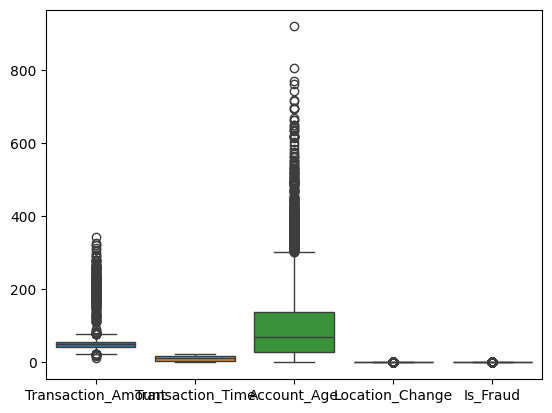

In [ ]:
#visualise outliers for numerical data
sns.boxplot(data=data)

In [29]:
# Encode categorical to numerical
le = LabelEncoder()
data['Previous_Location'] = le.fit_transform(data['Previous_Location'])
data['New_Location'] = le.fit_transform(data['New_Location'])
data.head()

,Transaction_Amount,Transaction_Time,Account_Age,Previous_Location,New_Location,Location_Change,Is_Fraud
0,67.640523,12,4.289545,4,2,1,0
1,54.001572,16,69.876618,0,6,1,0
2,59.787380,20,71.008455,8,3,1,0
3,72.408932,1,91.646912,1,5,1,0
4,68.675580,11,16.800002,1,2,1,0


In [ ]:
#use Location_Change (True/False) as an indicator feature.
data['Location_Change'] = np.where(data['Previous_Location'] == data['New_Location'], 0, 1)
data.head()

,Transaction_Amount,Transaction_Time,Account_Age,Previous_Location,New_Location,Location_Change,Is_Fraud
0,67.640523,12,4.289545,4,2,1,0
1,54.001572,16,69.876618,0,6,1,0
2,59.787380,20,71.008455,8,3,1,0
3,72.408932,1,91.646912,1,5,1,0
4,68.675580,11,16.800002,1,2,1,0


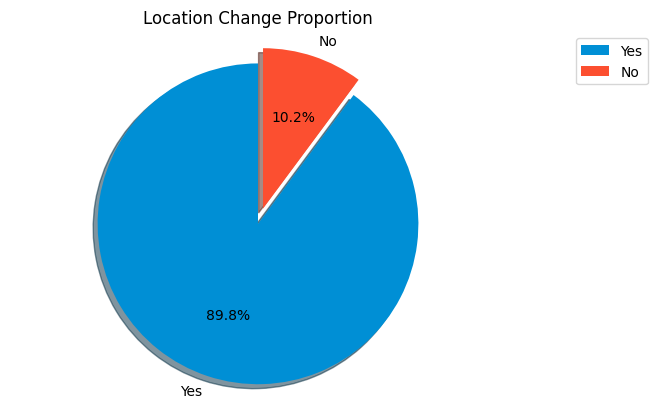

In [ ]:
# Plotting Senior Location Change Proportion

senior_citizen_counts = data['Location_Change'].value_counts()
labels = ['Yes', 'No']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.pie(senior_citizen_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Location Change Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

A higer proportion of the people doing the trasaction changed their location with close to 90% of the dataset showing change in location.

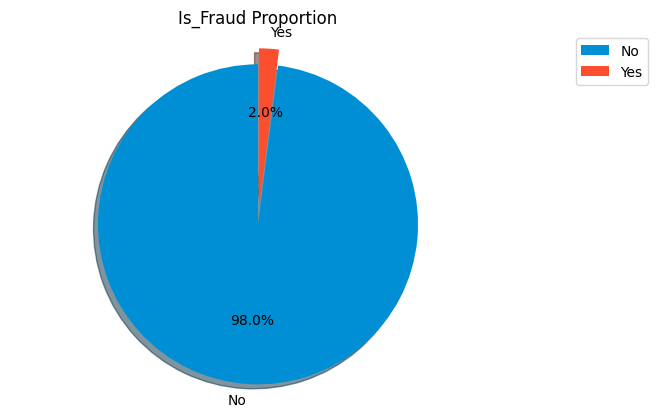

In [ ]:
# Plotting Senior Is_Fraud Proportion

senior_citizen_counts = data['Is_Fraud'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0, 0.1)
plt.pie(senior_citizen_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Is_Fraud Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

Only 2% of the dataset is identified as fraud. While it is not significant, it is still show a higher number of the data as fraud which needs to be further explored

<ipython-input-15-1c61bf9411e6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Transaction_Time'])


<Axes: xlabel='Transaction_Time', ylabel='Density'>

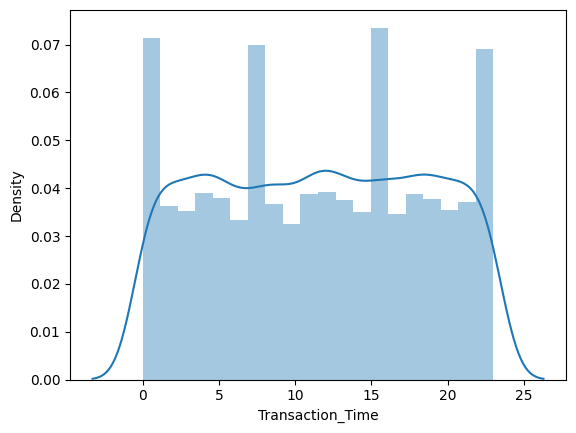

In [ ]:
#show a normal distribution of the Transaction time
sns.distplot(data['Transaction_Time'])


In [30]:
# display transaction Time effect on fraud
data.groupby('Is_Fraud')['Transaction_Time'].mean()

,Transaction_Time
Is_Fraud,
0,11.509592
1,11.330000


In [ ]:
data.corr()

,Transaction_Amount,Transaction_Time,Account_Age,Previous_Location,New_Location,Location_Change,Is_Fraud
Transaction_Amount,1.000000,0.000760,-0.114743,-0.005853,0.005315,0.006506,0.871828
Transaction_Time,0.000760,1.000000,-0.014158,0.007091,0.003833,0.014551,-0.003647
Account_Age,-0.114743,-0.014158,1.000000,-0.013188,0.008029,-0.003112,-0.128237
Previous_Location,-0.005853,0.007091,-0.013188,1.000000,0.013400,-0.006842,-0.007247
New_Location,0.005315,0.003833,0.008029,0.013400,1.000000,-0.003785,0.001700
Location_Change,0.006506,0.014551,-0.003112,-0.006842,-0.003785,1.000000,0.005485
Is_Fraud,0.871828,-0.003647,-0.128237,-0.007247,0.001700,0.005485,1.000000


<Axes: >

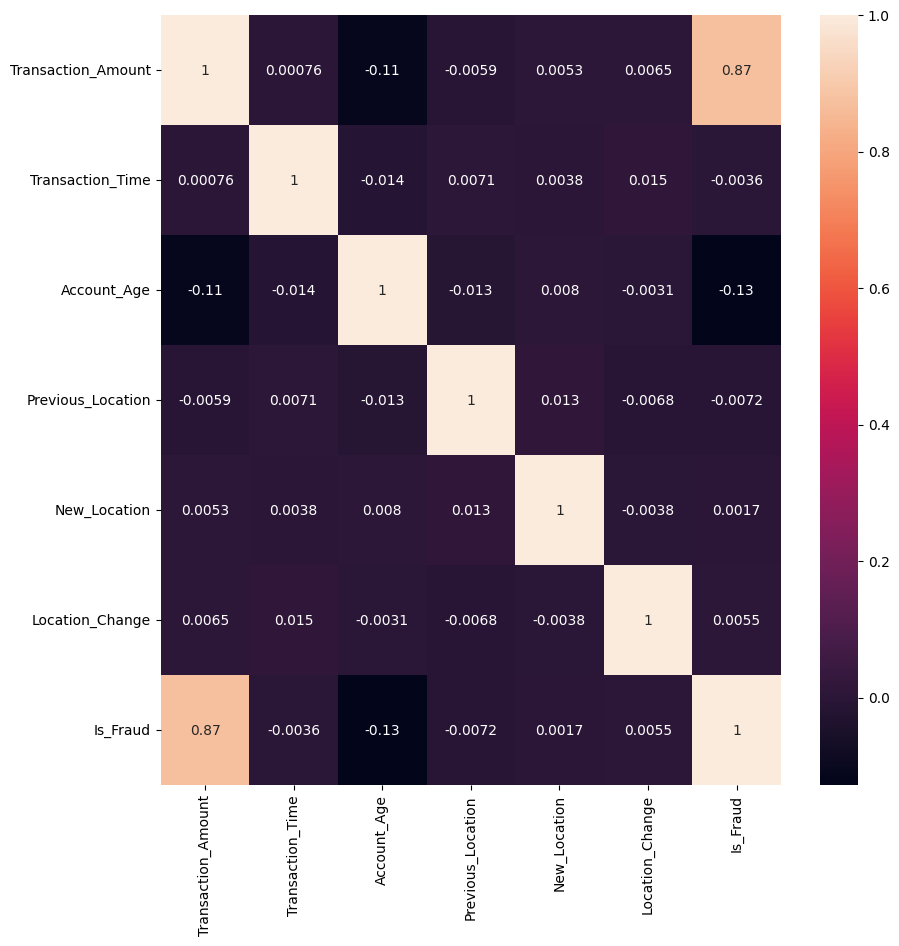

In [ ]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

The heatmap shows that how Transaction amount closely correlate positively with the Is Fraud. Also, Acount age shows a bit of negative correlation

<ipython-input-19-828023246899>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.index, y=churn_corr.values, palette='coolwarm')


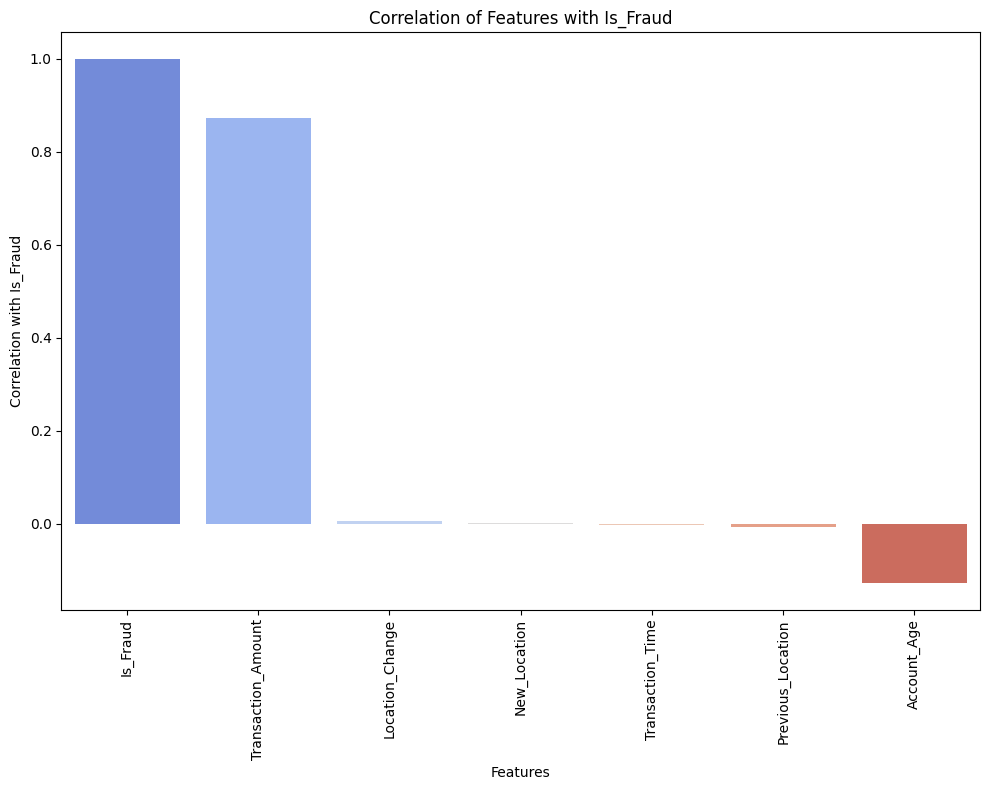

In [19]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Extract the correlation of all variables with the 'Churn' variable
churn_corr = corr_matrix['Is_Fraud'].sort_values(ascending=False)

# Plotting the correlation of all features with 'Churn'
plt.figure(figsize=(10, 8))
sns.barplot(x=churn_corr.index, y=churn_corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation of Features with Is_Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation with Is_Fraud')
plt.tight_layout()
plt.show()

Because there is closer to only 2% of fraud detected, the correlation matrix won't be giving enough information whether it affects fraud or not. However, from research, the New location and old location won't necessariry impact the fraud. So I will check a change in location and drop these two features

In [31]:
#Drop the 'New_Location' and 'Previous_Location' columns
data.drop(['New_Location', 'Previous_Location'], axis=1, inplace=True)
data.head()

,Transaction_Amount,Transaction_Time,Account_Age,Location_Change,Is_Fraud
0,67.640523,12,4.289545,1,0
1,54.001572,16,69.876618,1,0
2,59.787380,20,71.008455,1,0
3,72.408932,1,91.646912,1,0
4,68.675580,11,16.800002,1,0


#MODELLING

<ipython-input-32-d7c0e344e96e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Fraud', data=data, palette='viridis')


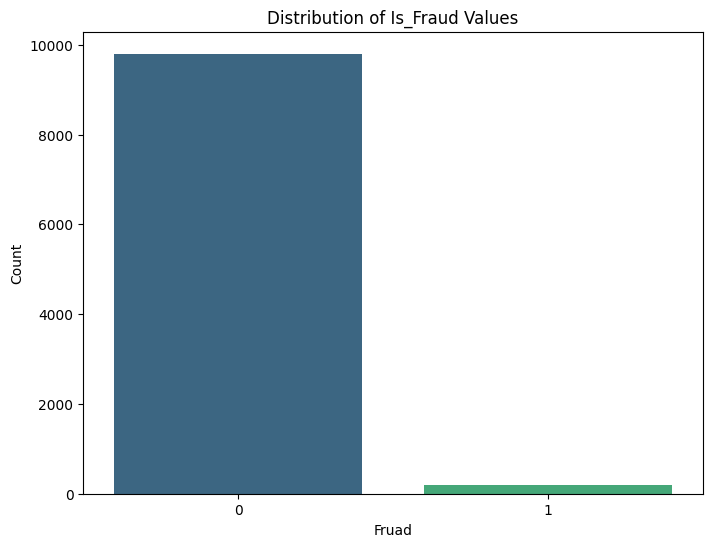

In [32]:
# Plot the distribution of is fraud values
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Fraud', data=data, palette='viridis')
plt.title('Distribution of Is_Fraud Values')
plt.xlabel('Fruad')
plt.ylabel('Count')
plt.show()

Given the significant imbalance between the Is_Fraud values, I applied SMOTE to increase the representation of the minority class (Fraud) in the dataset.

In [33]:
#Spliting the data
X = data.drop('Is_Fraud', axis=1)
y = data['Is_Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data to balance it
smote = SMOTE(random_state=42)
X_train_feature, y_train_feature = smote.fit_resample(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


<ipython-input-34-8f98fcbc60ca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_feature, palette='viridis')


Text(0, 0.5, 'Count')

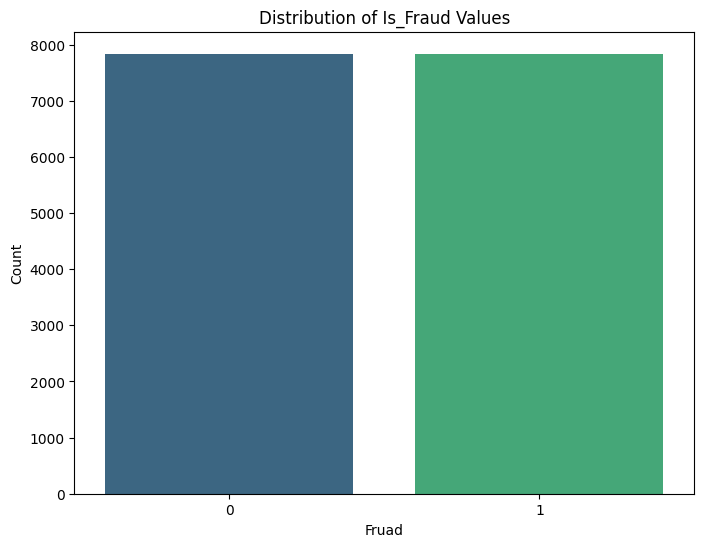

In [34]:
# Display new distribution with fraud
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_feature, palette='viridis')
plt.title('Distribution of Is_Fraud Values')
plt.xlabel('Fruad')
plt.ylabel('Count')

#NAIVE BAYES MODEL

In [35]:
# Initialize model
model = GaussianNB()

# Train the model
model.fit(X_train_feature, y_train_feature)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.2f}")

Accuracy: 0.99
Precision: 0.73
Recall: 1.00
F1 Score: 0.84
Cross-Validation Scores: [1.     0.9995 1.     1.     1.    ]
Mean CV Score: 1.00


The Naive Bayes model demonstrated strong performance, especially in detecting fraudulent transactions (100% recall). However, the lower precision of 73% indicates that the model might produce some false positives. This could be acceptable in fraud detection scenarios where missing a fraudulent transaction (false negative) is riskier than mistakenly flagging a legitimate transaction (false positive).

Additionally, the high cross-validation scores (with an average of 1.00) show that the model performs consistently across different subsets of the dataset. This suggests that the model generalizes well and is unlikely to suffer from overfitting, making it a reliable choice for fraud detection in this context

# USING GDA MODEL

In [36]:

# Initialize the GDA model (covariance type 'auto' for Gaussian)
gda = LDA()

# Train the model
gda.fit(X_train_feature, y_train_feature)

# Make predictions on the test set
y_pred = gda.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(gda, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 0.92
F1 Score: 0.96
Confusion Matrix:
[[1963    0]
 [   3   34]]
Cross-Validation Scores: [0.9965 0.997  0.9985 0.999  0.999 ]
Mean Cross-Validation Accuracy: 1.00


The GDA model exhibited excellent performance, with perfect precision and high recall, making it a strong candidate for fraud detection. The absence of false positives is a significant advantage in real-world applications, where mistakenly flagging legitimate transactions can cause customer dissatisfaction. The slightly lower recall indicates a small number of missed fraudulent transactions, which could be improved with further tuning. The high cross-validation accuracy demonstrates the model's robustness and suggests it can generalize well to new, unseen data

#Comparing the models
The GDA model is the preferred choice for this fraud detection task. It offers a better balance between high precision and recall, minimizing both false positives and false negatives. Its robust performance across cross-validation also indicates strong generalization, making it a reliable model for predicting fraudulent transactions in this dataset.

# Creating a program to test the algorithm

In [37]:
joblib.dump(gda, "gda_model.pkl")

['gda_model.pkl']

In [ ]:

# Load the trained GDA model
model = joblib.load("gda_model.pkl")

# Ask user for input features
transaction_amount = float(input("Enter Transaction Amount: "))
transaction_time = float(input("Enter Transaction Time (e.g., hour of the day): "))
account_age = float(input("Enter Account Age (in years): "))
location_change = int(input("Enter Location Change (1 for change, 0 for no change): "))

# Prepare input features as an array
features = np.array([[transaction_amount, transaction_time, account_age, location_change]])

# Make prediction
prediction = model.predict(features)

# Output result
if prediction == 1:
    print("⚠️ The transaction is predicted to be FRAUDULENT.")
else:
    print("✅ The transaction is predicted to be LEGITIMATE.")


Enter Transaction Amount: 239.927541
Enter Transaction Time (e.g., hour of the day): 9
Enter Account Age (in years): 1.663953
Enter Location Change (1 for change, 0 for no change): 1
⚠️ The transaction is predicted to be FRAUDULENT.


#Analysis

The key features influencing fraud detection in the model are **Transaction Amount, Transaction Time, Account Age, and Location Change**. Among these, **Transaction Amount and Location Change** are likely the most impactful. Large transaction amounts and sudden changes in location are common indicators of fraudulent activity, making these features particularly useful in detecting fraud. While Transaction Time and Account Age also contribute, they may play a less direct role in identifying fraud compared to the former two. However, upon testing with new values out the given dataset, it was also found that, extremely larger Account Age also impact the legitimacy of the transaction.

The perfomance might be influenced by the **overfitting**, as the model achieves near-perfect accuracy, which suggests that it may be too closely tuned to the training data and not generalizing well to unseen data.

To address these issues,
* Feature engineering can be enhanced by incorporating additional user behavioral patterns and geographic data. These extra features can help capture more nuanced information about transaction behavior and improve the model's ability to distinguish between legitimate and fraudulent transactions.
* Using more advanced models, such as ensemble methods like Random Forest or Gradient Boosting, could help improve the model's generalization and reduce overfitting.
* Regular retraining with new data and fine-tuning hyperparameters would also be beneficial for maintaining performance